## Observations and Insights

1. From the bar charts, it is observed that Capomulin and Ramicane were the two regimens in which a greater number of tests were performed, which makes a lot of sense since in the boxplots it is also observed that these were the two drugs that showed a better responses on treated mice.


2. For the mouse treated with Capomulin "y793" it is clearly observed on the graph that the volume of its tumor decreases by 13mm, which represents a very positive result and although the graph represents only one sample, the box plot shows that the behavior is similar for all mice treated with this Droug Regimen.


3. From the scatter plot and linear regression it is clear that there is a strong correlation between the weight of the mice and the volume of tumor they develop, this is the higher weight, the greater the volume of the tumor.

## Dependencies and starter code

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
Data_df = pd.merge(study_results, mouse_metadata, how='inner', on ="Mouse ID")
Data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = Data_df.groupby(Data_df["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = Data_df.groupby(Data_df["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance = Data_df.groupby(Data_df["Drug Regimen"])["Tumor Volume (mm3)"].var()
stdev = Data_df.groupby(Data_df["Drug Regimen"])["Tumor Volume (mm3)"].std()
SEM = Data_df.groupby(Data_df["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean":mean, "Median":median, "Variance":variance,"Standard Deviation":stdev, "SEM":SEM})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

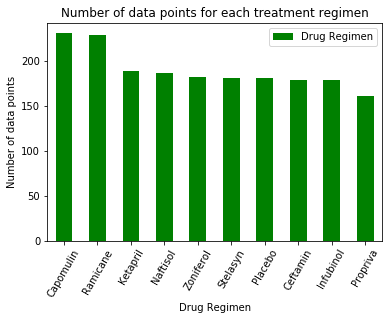

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

In [24]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
numbers = Data_df["Drug Regimen"].value_counts()
numbers.plot(kind="bar", color="green", title = "Number of data points for each treatment regimen", rot=60)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of data points")
plt.legend(loc = 'best')

plt.show()

numbers

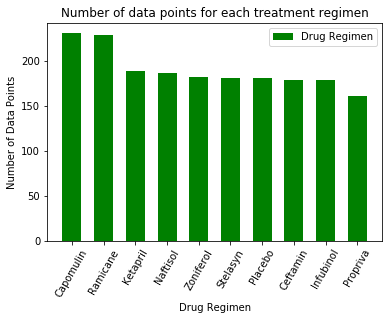

In [30]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x = numbers.index
plt.bar(x, numbers, color="green", width=.6)
plt.title("Number of data points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation = 60)

plt.legend(["Drug Regimen"])
plt.show()

## Pie plots

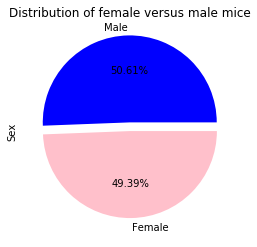

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
dist_gen = Data_df["Sex"].value_counts()
colors = ["blue", "pink"]
explode = [0.1, 0]
dist_gen.plot(kind = "pie",  title = "Distribution of female versus male mice", autopct = "%1.2f%%", explode=explode, colors=colors)
plt.show()

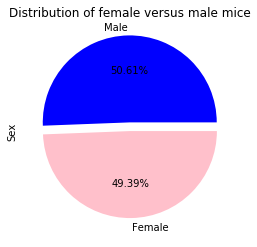

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["blue", "pink"]
explode = [0.1, 0]
plt.pie(x = dist_gen,  autopct = "%1.2f%%", colors = colors, labels = dist_gen.index, explode = explode)
plt.ylabel("Sex")
plt.title("Distribution of female versus male mice")

plt.show()

## Quartiles, outliers and boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.


tumor_initial_df = Data_df.groupby("Mouse ID", as_index = False).first()
tumor_final_df = Data_df.groupby("Mouse ID", as_index = False).last()

tumor_final_df["Vol_change"]=(tumor_final_df["Tumor Volume (mm3)"]-tumor_initial_df["Tumor Volume (mm3)"])

tumor_final_df

#dato = tumor_final_df.loc[tumor_final_df["Mouse ID"]=="y793"]["Vol_final-inic"]
#dato

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Vol_change
0,a203,45,67.973419,2,Infubinol,Female,20,23,22.973419
1,a251,45,65.525743,1,Infubinol,Female,21,25,20.525743
2,a262,45,70.717621,4,Placebo,Female,17,29,25.717621
3,a275,45,62.999356,3,Ceftamin,Female,20,28,17.999356
4,a366,30,63.440686,1,Stelasyn,Female,16,29,18.440686
...,...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26,3.710661
245,z578,45,30.638696,0,Ramicane,Male,11,16,-14.361304
246,z581,45,62.754451,3,Infubinol,Female,24,25,17.754451
247,z795,45,65.741070,3,Naftisol,Female,13,29,20.741070


In [74]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Capomulin 
capomulin_df = tumor_final_df.loc[tumor_final_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
# Ramicane 
ramicane_df = tumor_final_df.loc[tumor_final_df["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
# Infubinol 
infubinol_df = tumor_final_df.loc[tumor_final_df["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
# Ceftamin 
ceftamin_df = tumor_final_df.loc[tumor_final_df["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]

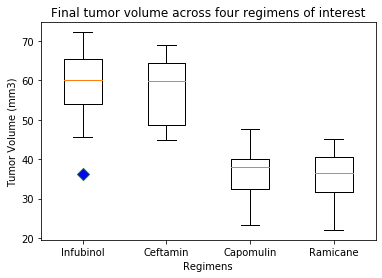

In [81]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot([infubinol_df, ceftamin_df, capomulin_df, ramicane_df],
           labels = ["Infubinol", "Ceftamin", "Capomulin", "Ramicane"],
           flierprops={'marker': 'D', 'markerfacecolor':'blue',
                       'markersize':8, 'markeredgecolor':'g'})
plt.title("Final tumor volume across four regimens of interest")
plt.xlabel("Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and scatter plots

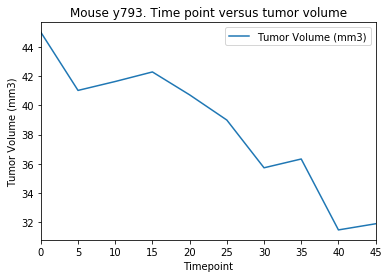

In [103]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulin_df = Data_df.loc[Data_df["Drug Regimen"] == "Capomulin"]
# Choose a mouse and extract the data from it
y793 = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "y793"]
y793.plot(kind = "line", x = "Timepoint", y = "Tumor Volume (mm3)", 
                     title = "Mouse y793. Time point versus tumor volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

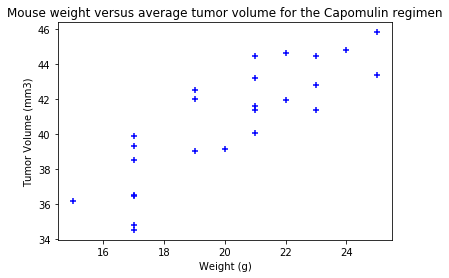

In [88]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mean_df = Capomulin_df.groupby("Mouse ID").mean()
plt.scatter(x = mean_df["Weight (g)"], y = mean_df["Tumor Volume (mm3)"],
           color = 'b', marker = '+')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse weight versus average tumor volume for the Capomulin regimen")
plt.show()

The correlation coefficient: 0.8419
Linear Equation: y = 0.95x + 21.55



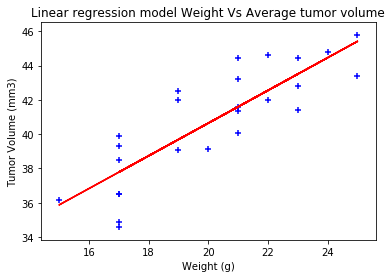

In [101]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

coeff = st.pearsonr(mean_df["Weight (g)"], mean_df["Tumor Volume (mm3)"])
print("The correlation coefficient: "+ str(round(coeff[0],4)))

slope, intercept, r_value, p_value, std_err = st.linregress(mean_df["Weight (g)"], mean_df["Tumor Volume (mm3)"])
linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print( "Linear Equation: "+ linear_equation + "\n")

x = mean_df["Weight (g)"]
mean_df["Tumor Volume (mm3) Linear"] = slope * x + intercept

plt.plot(x,mean_df["Tumor Volume (mm3) Linear"], color = "r")
plt.scatter(x = mean_df["Weight (g)"], y = mean_df["Tumor Volume (mm3)"],color = 'b', marker = '+')

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Linear regression model Weight Vs Average tumor volume")
plt.show()